In [ ]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')

from src.model_training import ModelTrainer

In [ ]:
# Ensure pandas is imported
if 'pd' not in globals():
    import pandas as pd

# Load data
df = pd.read_csv('../data/processed/engineered_data.csv')
print(f"Data Shape: {df.shape}")
df.head()

Data Shape: (250000, 29)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Amenities,Facing,Owner_Type,Availability_Status,Amenities_Count,School_Density_Score,Infrastructure_Score,Floor_Ratio,Future_Price_5Y,Good_Investment
0,1,15,6,483,0,1,4740,489.76,0.10,1990,...,"Playground, Gym, Garden, Pool, Clubhouse",3,2,0,5,0.277778,4.7,11.000000,719.618119,0
1,2,11,33,434,1,3,2364,195.52,0.08,2008,...,"Playground, Clubhouse, Pool, Gym, Garden",1,1,1,5,0.444444,2.7,1.000000,287.283026,1
2,3,13,25,75,0,2,3642,183.79,0.05,1997,...,"Clubhouse, Pool, Playground, Gym",2,0,0,4,0.310345,5.1,0.678571,270.047807,1
3,4,14,21,326,1,2,2741,300.29,0.11,1991,...,"Playground, Clubhouse, Gym, Pool, Garden",1,1,0,5,0.142857,4.4,0.777778,441.224528,0
4,5,14,19,407,2,4,4823,182.90,0.04,2002,...,"Playground, Garden, Gym, Pool, Clubhouse",0,1,0,5,0.166667,3.9,1.000000,268.740105,1


In [ ]:
# Ensure pandas and numpy are imported
if 'pd' not in globals():
    import pandas as pd
if 'np' not in globals():
    import numpy as np

# Define features for modeling
feature_cols = [
    'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
    'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property',
    'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
    'Parking_Space', 'Infrastructure_Score', 'Amenities_Count',
    'School_Density_Score', 'Floor_Ratio'
]

print(f"Using {len(feature_cols)} features")
for feature in feature_cols:
    print(f"  - {feature}")

📋 Using 16 features
  • BHK
  • Size_in_SqFt
  • Price_in_Lakhs
  • Price_per_SqFt
  • Year_Built
  • Floor_No
  • Total_Floors
  • Age_of_Property
  • Nearby_Schools
  • Nearby_Hospitals
  • Public_Transport_Accessibility
  • Parking_Space
  • Infrastructure_Score
  • Amenities_Count
  • School_Density_Score
  • Floor_Ratio


In [ ]:
# Initialize model trainer
from src.model_training import ModelTrainer
trainer = ModelTrainer(experiment_name="real_estate_investment")

2025/12/17 10:36:14 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/17 10:36:14 INFO mlflow.store.db.utils: Updating database tables
2025/12/17 10:36:14 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/17 10:36:14 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/17 10:36:14 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2025/12/17 10:36:14 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025/12/17 10:36:14 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025/12/17 10:36:14 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025/12/17 10:36:14 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025/12/17 10:36:14 INFO alembic.runtime.migration: Running 

In [ ]:
# Ensure all required imports and variables exist
if 'pd' not in globals():
    import pandas as pd
if 'trainer' not in globals():
    from src.model_training import ModelTrainer
    trainer = ModelTrainer(experiment_name="real_estate_investment")
if 'df' not in globals():
    df = pd.read_csv('../data/processed/engineered_data.csv')
if 'feature_cols' not in globals():
    feature_cols = [
        'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
        'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property',
        'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
        'Parking_Space', 'Infrastructure_Score', 'Amenities_Count',
        'School_Density_Score', 'Floor_Ratio'
    ]

print("\n" + "="*70)
print("CLASSIFICATION TASK: Good Investment Prediction")
print("="*70)

# Prepare data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = trainer.prepare_data(
    df, 
    target_col='Good_Investment',
    feature_cols=feature_cols
)

# Store results
classification_results = {}

# Train Logistic Regression
model_lr, metrics_lr = trainer.train_classification_model(
    X_train_cls, X_test_cls, y_train_cls, y_test_cls,
    model_type='lr'
)
classification_results['Logistic Regression'] = metrics_lr

# Train Random Forest
model_rf, metrics_rf = trainer.train_classification_model(
    X_train_cls, X_test_cls, y_train_cls, y_test_cls,
    model_type='rf'
)
classification_results['Random Forest'] = metrics_rf

# Train XGBoost
model_xgb, metrics_xgb = trainer.train_classification_model(
    X_train_cls, X_test_cls, y_train_cls, y_test_cls,
    model_type='xgb'
)
classification_results['XGBoost'] = metrics_xgb


🎯 CLASSIFICATION TASK: Good Investment Prediction

📊 Preparing data for 'Good_Investment'...
  ✓ Training set: 200000 samples
  ✓ Test set: 50000 samples
  ✓ Features: 16

🎯 Training Classification Model: LR
  ⏳ Training...


c:\Users\VSammiti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/12/17 10:36:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



  📊 LR Classification Results:
  ✓ Accuracy:  0.8850
  ✓ Precision: 0.8541
  ✓ Recall:    0.8401
  ✓ ROC AUC:   0.9569

  Confusion Matrix:
  [[28332  2720]
 [ 3030 15918]]

🎯 Training Classification Model: RF
  ⏳ Training...


2025/12/17 10:36:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



  📊 RF Classification Results:
  ✓ Accuracy:  0.9972
  ✓ Precision: 0.9987
  ✓ Recall:    0.9940
  ✓ ROC AUC:   0.9998

  Confusion Matrix:
  [[31028    24]
 [  114 18834]]

🎯 Training Classification Model: XGB
  ⏳ Training...


2025/12/17 10:37:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



  📊 XGB Classification Results:
  ✓ Accuracy:  0.9970
  ✓ Precision: 0.9979
  ✓ Recall:    0.9942
  ✓ ROC AUC:   1.0000

  Confusion Matrix:
  [[31012    40]
 [  110 18838]]


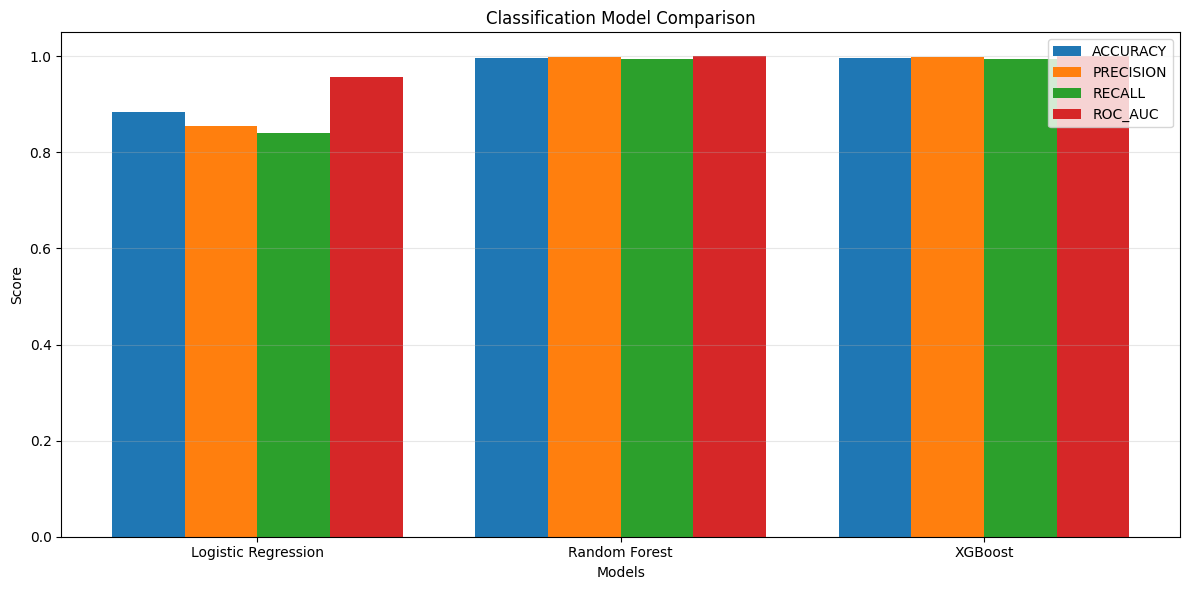


📊 Classification Results Summary:

Logistic Regression:
  accuracy: 0.8850
  precision: 0.8541
  recall: 0.8401
  roc_auc: 0.9569

Random Forest:
  accuracy: 0.9972
  precision: 0.9987
  recall: 0.9940
  roc_auc: 0.9998

XGBoost:
  accuracy: 0.9970
  precision: 0.9979
  recall: 0.9942
  roc_auc: 1.0000


In [ ]:
# Compare classification models
if 'np' not in globals():
    import numpy as np
if 'classification_results' not in globals():
    print("Error: classification_results not defined. Run the classification training cell first.")
    raise NameError("classification_results is not defined")
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

models = list(classification_results.keys()) # type: ignore
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

x = np.arange(len(models))
width = 0.2

for i, metric in enumerate(metrics):
    values = [classification_results[model][metric] for model in models] # pyright: ignore[reportUndefinedVariable]
    ax.bar(x + i*width, values, width, label=metric.upper())

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Classification Model Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nClassification Results Summary:")
for model, metrics in classification_results.items(): # pyright: ignore[reportUndefinedVariable]
    print(f"\n{model}:")
    for metric, value in metrics.items():
        if metric != 'confusion_matrix':
            print(f"  {metric}: {value:.4f}")

In [ ]:
# Ensure all required imports and variables exist
if 'trainer' not in globals():
    from src.model_training import ModelTrainer
    trainer = ModelTrainer(experiment_name="real_estate_investment")
if 'df' not in globals():
    import pandas as pd
    df = pd.read_csv('../data/processed/engineered_data.csv')
if 'feature_cols' not in globals():
    feature_cols = [
        'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
        'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property',
        'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
        'Parking_Space', 'Infrastructure_Score', 'Amenities_Count',
        'School_Density_Score', 'Floor_Ratio'
    ]

print("\n" + "="*70)
print("REGRESSION TASK: Future Price Prediction")
print("="*70)

# Prepare data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = trainer.prepare_data(
    df,
    target_col='Future_Price_5Y',
    feature_cols=feature_cols
)

# Store results
regression_results = {}

# Train Linear Regression
model_lr, metrics_lr = trainer.train_regression_model(
    X_train_reg, X_test_reg, y_train_reg, y_test_reg,
    model_type='lr'
)
regression_results['Linear Regression'] = metrics_lr

# Train Random Forest
model_rf, metrics_rf = trainer.train_regression_model(
    X_train_reg, X_test_reg, y_train_reg, y_test_reg,
    model_type='rf'
)
regression_results['Random Forest'] = metrics_rf

# Train XGBoost
model_xgb, metrics_xgb = trainer.train_regression_model(
    X_train_reg, X_test_reg, y_train_reg, y_test_reg,
    model_type='xgb'
)
regression_results['XGBoost'] = metrics_xgb


💰 REGRESSION TASK: Future Price Prediction

📊 Preparing data for 'Future_Price_5Y'...
  ✓ Training set: 200000 samples
  ✓ Test set: 50000 samples
  ✓ Features: 16

💰 Training Regression Model: LR
  ⏳ Training...


2025/12/17 10:37:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



  📊 LR Regression Results:
  ✓ RMSE: 0.0000
  ✓ MAE:  0.0000
  ✓ R²:   1.0000

💰 Training Regression Model: RF
  ⏳ Training...


2025/12/17 10:37:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



  📊 RF Regression Results:
  ✓ RMSE: 0.0378
  ✓ MAE:  0.0280
  ✓ R²:   1.0000

💰 Training Regression Model: XGB
  ⏳ Training...


2025/12/17 10:38:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



  📊 XGB Regression Results:
  ✓ RMSE: 0.8148
  ✓ MAE:  0.7045
  ✓ R²:   1.0000


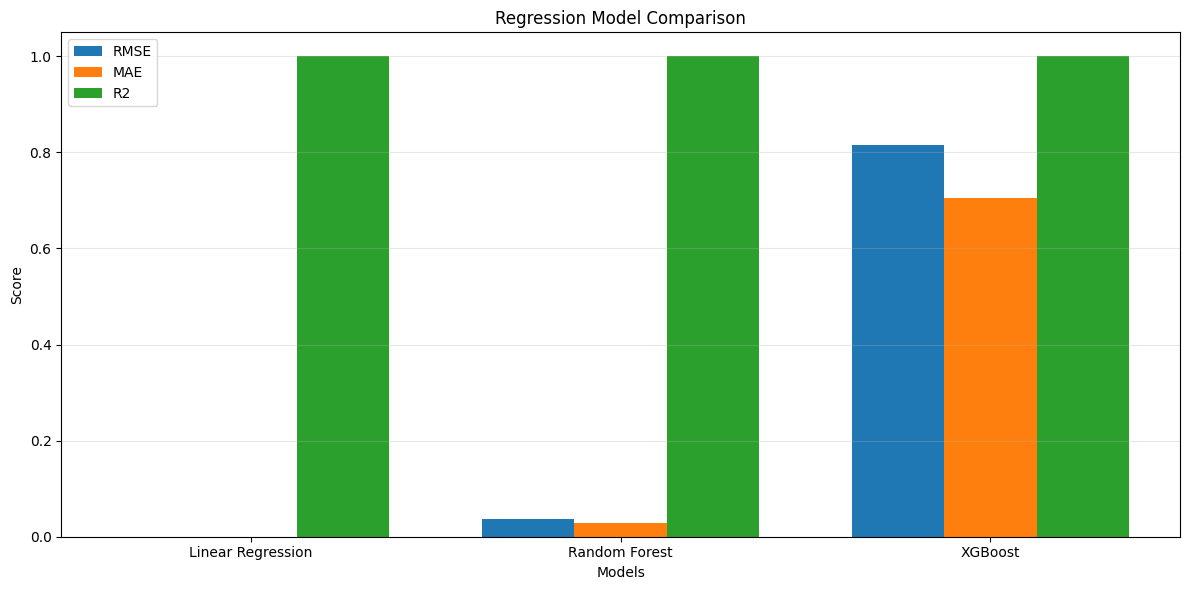


📊 Regression Results Summary:

Linear Regression:
  rmse: 0.0000
  mae: 0.0000
  r2: 1.0000

Random Forest:
  rmse: 0.0378
  mae: 0.0280
  r2: 1.0000

XGBoost:
  rmse: 0.8148
  mae: 0.7045
  r2: 1.0000


In [ ]:
# Compare regression models
if 'np' not in globals():
    import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

models = list(regression_results.keys()) # pyright: ignore[reportUndefinedVariable]
metrics = ['rmse', 'mae', 'r2']

x = np.arange(len(models))
width = 0.25

for i, metric in enumerate(metrics):
    values = [regression_results[model][metric] for model in models] # pyright: ignore[reportUndefinedVariable]
    ax.bar(x + i*width, values, width, label=metric.upper())

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Regression Model Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\nRegression Results Summary:")
for model, metrics in regression_results.items(): # pyright: ignore[reportUndefinedVariable]
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

In [ ]:
# Save models
trainer.save_models( # pyright: ignore[reportUndefinedVariable]
    class_path='../models/classification_model.pkl',
    reg_path='../models/regression_model.pkl'
)

print("\nTraining Complete!")


💾 Saving Models...
  ✓ Classification model: ../models/classification_model.pkl
  ✓ Regression model: ../models/regression_model.pkl

✅ Training Complete!
